In [58]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [23]:
def create_exp2_data(n_features_array: list, n_samples: int = 5_000, centers: int = 5, random_state: int = 17):
    global_storage: dict = {}
    for n_feature in n_features_array:
        local_storage: dict = {}
        X, labels_true = make_blobs(
            n_samples=n_samples, 
            n_features=n_feature,
            centers=centers, 
            random_state=random_state, 
        )
        X_scaled = StandardScaler().fit_transform(X)
        local_storage['X'], local_storage['X_scaled'], local_storage['labels_true'] = X, X_scaled, labels_true
        global_storage[n_feature] = local_storage
    return global_storage

In [84]:
census_data = pd.read_csv('/Users/ayan/Downloads/USCensus1990.data.txt', sep=',')
census_data.head()

,caseid,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,iEnglish,iFeb55,iFertil,dHispanic,dHour89,dHours,iImmigr,dIncome1,dIncome2,dIncome3,dIncome4,dIncome5,dIncome6,dIncome7,dIncome8,dIndustry,iKorean,iLang1,iLooking,iMarital,iMay75880,iMeans,iMilitary,iMobility,iMobillim,dOccup,iOthrserv,iPerscare,dPOB,dPoverty,dPwgt1,iRagechld,dRearning,iRelat1,iRelat2,iRemplpar,iRiders,iRlabor,iRownchld,dRpincome,iRPOB,iRrelchld,iRspouse,iRvetserv,iSchool,iSept80,iSex,iSubfam1,iSubfam2,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
0,10000,5,0,1,0,0,5,3,2,2,1,0,1,0,4,3,0,2,0,0,1,0,0,0,0,10,0,1,0,1,0,1,4,2,2,3,0,2,0,2,1,4,3,0,0,0,3,1,0,3,22,0,3,0,1,0,1,0,0,0,5,0,2,1,1,0,11,1,0
1,10001,6,1,1,0,0,7,5,2,2,0,0,3,0,1,1,0,1,0,0,0,0,1,0,0,4,0,2,0,0,0,1,4,1,2,2,0,2,0,2,2,4,2,1,0,0,1,1,0,2,10,0,1,0,1,0,1,0,0,0,1,0,2,1,1,0,5,1,0
2,10002,3,1,2,0,0,7,4,2,2,0,0,1,0,4,4,0,1,0,1,0,0,0,0,0,1,0,2,0,4,0,10,4,1,2,4,0,2,0,2,1,4,2,2,0,0,0,1,0,2,10,0,6,0,1,0,1,0,0,0,2,0,2,1,1,0,10,1,0
3,10003,4,1,2,0,0,1,3,2,2,0,0,3,0,3,3,0,1,0,0,0,0,0,0,1,4,0,2,0,2,0,1,4,1,2,2,0,2,0,2,1,2,2,0,0,0,1,1,0,2,10,0,4,0,1,0,1,0,0,0,1,0,1,1,1,0,10,1,0
4,10004,7,1,1,0,0,0,0,2,2,0,0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,2,0,0,0,4,1,2,0,0,2,0,2,1,4,0,1,0,0,0,6,0,2,22,0,1,0,1,0,1,0,0,3,0,0,0,2,2,0,5,6,0


In [97]:
kmeans = KMeans(
    n_clusters=2, 
    #random_state=exp2_random_state,
).fit(credit_card_cleaned)
kmeans_labels_pred = kmeans.labels_

silhouette_score: float = metrics.silhouette_score(X=credit_card_cleaned, labels=kmeans_labels_pred)
print(silhouette_score)

0.511307699456009


In [24]:
exp2_n_samples = 5_000
exp2_centers = 5
exp2_random_state = 17
exp2_n_features_array: list = [3, 10, 100, 500, 1_000, 2_000]

exp2_data: dict = create_exp2_data(n_features_array=exp2_n_features_array)

### DBSCAN

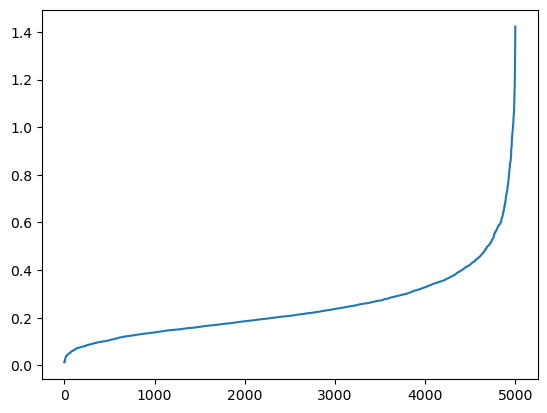

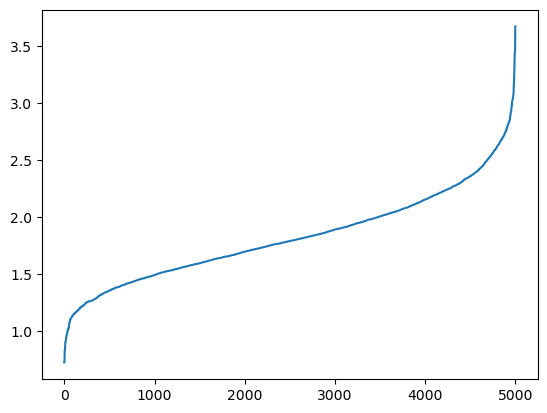

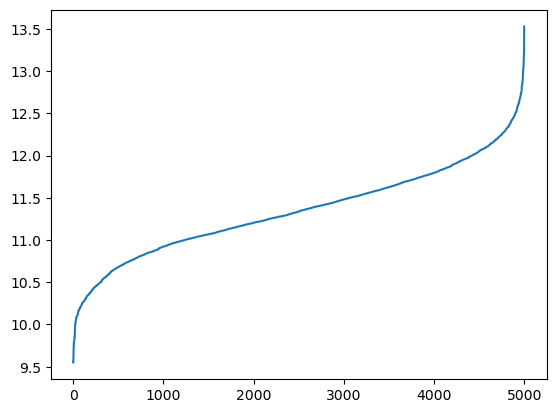

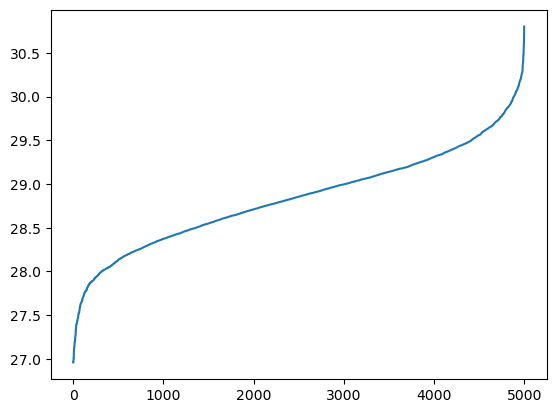

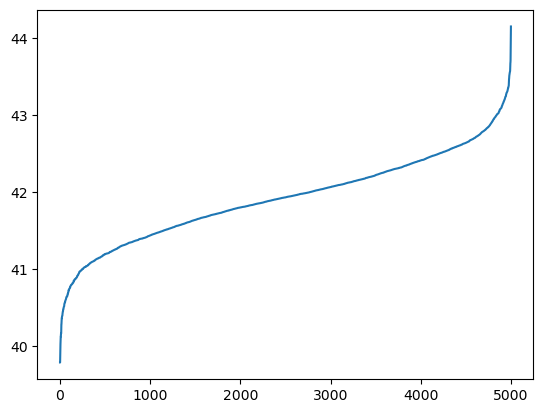

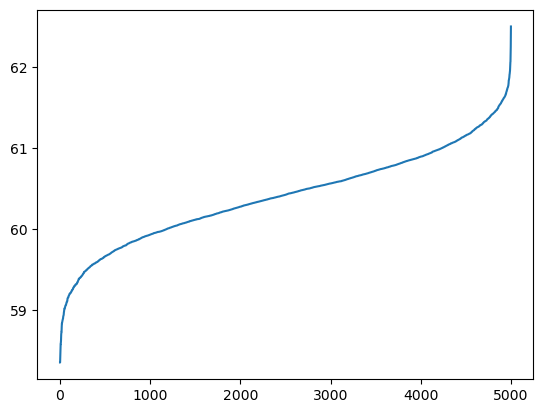

In [89]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

for n_feature in exp2_n_features_array:
    neighbors = NearestNeighbors(n_neighbors=n_feature*2).fit(exp2_data[n_feature]['X'])
    distances, indices = neighbors.kneighbors(exp2_data[n_feature]['X'])

    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.show()

In [90]:
exp2_eps_array: list = [0.60, 2.75, 12.50, 30.00, 43.50, 61.75]

In [91]:
for n_feature, eps in zip(exp2_n_features_array, exp2_eps_array):
    dbscan = DBSCAN(eps=eps, min_samples=10).fit(exp2_data[n_feature]['X'])
    dbscan_labels_pred = dbscan.labels_
    
    rand_score: float = metrics.rand_score(exp2_data[n_feature]['labels_true'], dbscan_labels_pred)
    homogeneity_score: float = metrics.homogeneity_score(exp2_data[n_feature]['labels_true'], dbscan_labels_pred)
    # silhouette_score: float = metrics.silhouette_score(X=exp2_data[n_feature]['X'], labels=dbscan_labels_pred)
    
    print('n_feature is ', n_feature, ' and its eps value is ', eps)
    print('rand_score: ', rand_score)
    print('homogeneity_score: ', homogeneity_score)
    # print('silhouette_score: ', silhouette_score)
    print('-------------------------------------')

n_feature is  3  and its eps value is  0.6
rand_score:  0.9421438687737548
homogeneity_score:  0.8720531781885994
-------------------------------------
n_feature is  10  and its eps value is  2.75
rand_score:  0.9886555711142229
homogeneity_score:  0.9724476274671248
-------------------------------------
n_feature is  100  and its eps value is  12.5
rand_score:  0.9918462892578516
homogeneity_score:  0.9802121723263572
-------------------------------------
n_feature is  500  and its eps value is  30.0
rand_score:  0.9904451290258052
homogeneity_score:  0.977158222828381
-------------------------------------
n_feature is  1000  and its eps value is  43.5
rand_score:  0.9983954390878176
homogeneity_score:  0.9963251123511646
-------------------------------------
n_feature is  2000  and its eps value is  61.75
rand_score:  0.9971839167833567
homogeneity_score:  0.9933321129258849
-------------------------------------


### HDBSCAN

In [31]:
import hdbscan

In [32]:
for n_feature in exp2_n_features_array:
    hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=10, metric='euclidean').fit(exp2_data[n_feature]['X_scaled'])
    hdbscan_labels_pred = hdbscan_clusterer.labels_
    
    rand_score: float = metrics.rand_score(exp2_data[n_feature]['labels_true'], hdbscan_labels_pred)
    homogeneity_score: float = metrics.homogeneity_score(exp2_data[n_feature]['labels_true'], hdbscan_labels_pred)
    silhouette_score: float = metrics.silhouette_score(X=exp2_data[n_feature]['X_scaled'], labels=hdbscan_labels_pred)
    
    print('n_feature is ', n_feature)
    print('rand_score: ', rand_score)
    print('homogeneity_score: ', homogeneity_score)
    print('silhouette_score: ', silhouette_score)
    print('-------------------------------------')

n_feature is  3
rand_score:  0.9993599519903981
homogeneity_score:  0.99892415057786
silhouette_score:  0.7032232591578749
-------------------------------------
n_feature is  10
rand_score:  1.0
homogeneity_score:  1.0
silhouette_score:  0.8101446120879308
-------------------------------------
n_feature is  100
rand_score:  1.0
homogeneity_score:  1.0
silhouette_score:  0.7804235731636148
-------------------------------------
n_feature is  500
rand_score:  1.0
homogeneity_score:  1.0
silhouette_score:  0.781118586378627
-------------------------------------
n_feature is  1000
rand_score:  1.0
homogeneity_score:  1.0
silhouette_score:  0.7913019398895927
-------------------------------------
n_feature is  2000
rand_score:  1.0
homogeneity_score:  1.0
silhouette_score:  0.7913027627737743
-------------------------------------


### K-means

In [33]:
from sklearn.cluster import KMeans

In [39]:
for n_feature in exp2_n_features_array:
    kmeans = KMeans(
        n_clusters=exp2_centers, 
        #random_state=exp2_random_state,
    ).fit(exp2_data[n_feature]['X_scaled'])
    kmeans_labels_pred = kmeans.labels_
    
    rand_score: float = metrics.rand_score(exp2_data[n_feature]['labels_true'], kmeans_labels_pred)
    homogeneity_score: float = metrics.homogeneity_score(exp2_data[n_feature]['labels_true'], kmeans_labels_pred)
    silhouette_score: float = metrics.silhouette_score(X=exp2_data[n_feature]['X_scaled'], labels=kmeans_labels_pred)
    
    print('n_feature is ', n_feature)
    print('rand_score: ', rand_score)
    print('homogeneity_score: ', homogeneity_score)
    print('silhouette_score: ', silhouette_score)
    print('-------------------------------------')

n_feature is  3
rand_score:  0.9998400480096019
homogeneity_score:  0.9990172649654514
silhouette_score:  0.7047217250800945
-------------------------------------
n_feature is  10
rand_score:  1.0
homogeneity_score:  1.0
silhouette_score:  0.8101446120879308
-------------------------------------
n_feature is  100
rand_score:  1.0
homogeneity_score:  1.0
silhouette_score:  0.7804235731636148
-------------------------------------
n_feature is  500
rand_score:  1.0
homogeneity_score:  1.0
silhouette_score:  0.781118586378627
-------------------------------------
n_feature is  1000
rand_score:  1.0
homogeneity_score:  1.0
silhouette_score:  0.7913019398895927
-------------------------------------
n_feature is  2000
rand_score:  1.0
homogeneity_score:  1.0
silhouette_score:  0.7913027627737743
-------------------------------------


### BIRCH

In [36]:
from sklearn.cluster import Birch

In [37]:
for n_feature in exp2_n_features_array:
    birch = Birch(threshold=0.5, branching_factor=50, n_clusters=exp2_centers).fit(exp2_data[n_feature]['X_scaled'])
    birch_labels_pred = birch.labels_
    
    rand_score: float = metrics.rand_score(exp2_data[n_feature]['labels_true'], birch_labels_pred)
    homogeneity_score: float = metrics.homogeneity_score(exp2_data[n_feature]['labels_true'], birch_labels_pred)
    silhouette_score: float = metrics.silhouette_score(X=exp2_data[n_feature]['X_scaled'], labels=birch_labels_pred)
    
    print('n_feature is ', n_feature)
    print('rand_score: ', rand_score)
    print('homogeneity_score: ', homogeneity_score)
    print('silhouette_score: ', silhouette_score)
    print('-------------------------------------')

n_feature is  3
rand_score:  0.9998400480096019
homogeneity_score:  0.9990172649654514
silhouette_score:  0.7047217250800945
-------------------------------------
n_feature is  10
rand_score:  1.0
homogeneity_score:  1.0
silhouette_score:  0.8101446120879308
-------------------------------------
n_feature is  100
rand_score:  1.0
homogeneity_score:  1.0
silhouette_score:  0.7804235731636148
-------------------------------------
n_feature is  500
rand_score:  1.0
homogeneity_score:  1.0
silhouette_score:  0.781118586378627
-------------------------------------
n_feature is  1000
rand_score:  1.0
homogeneity_score:  1.0
silhouette_score:  0.7913019398895927
-------------------------------------
n_feature is  2000
rand_score:  1.0
homogeneity_score:  1.0
silhouette_score:  0.7913027627737743
-------------------------------------


In [23]:
%%memit
birch = Birch(threshold=0.5, branching_factor=50, n_clusters=exp1_centers).fit(exp1_data[100]['X_scaled'])

peak memory: 949.30 MiB, increment: 0.59 MiB


In [24]:
%%memit
birch = Birch(threshold=0.5, branching_factor=50, n_clusters=exp1_centers).fit(exp1_data[1_000]['X_scaled'])

peak memory: 949.33 MiB, increment: 0.02 MiB


In [25]:
%%memit
birch = Birch(threshold=0.5, branching_factor=50, n_clusters=exp1_centers).fit(exp1_data[10_000]['X_scaled'])

peak memory: 949.36 MiB, increment: 0.03 MiB


In [26]:
%%memit
birch = Birch(threshold=0.5, branching_factor=50, n_clusters=exp1_centers).fit(exp1_data[100_000]['X_scaled'])

peak memory: 951.42 MiB, increment: 2.06 MiB


In [27]:
%%memit
birch = Birch(threshold=0.5, branching_factor=50, n_clusters=exp1_centers).fit(exp1_data[1_000_000]['X_scaled'])

peak memory: 967.42 MiB, increment: 16.00 MiB


In [28]:
%%memit
birch = Birch(threshold=0.5, branching_factor=50, n_clusters=exp1_centers).fit(exp1_data[2_000_000]['X_scaled'])

peak memory: 967.42 MiB, increment: 0.00 MiB


### Agglomerative clustering

In [29]:
from sklearn.cluster import AgglomerativeClustering

In [30]:
%%memit
agglomerative = AgglomerativeClustering(n_clusters=exp1_centers).fit(exp1_data[100]['X_scaled'])

peak memory: 967.47 MiB, increment: -0.02 MiB


In [31]:
%%memit
agglomerative = AgglomerativeClustering(n_clusters=exp1_centers).fit(exp1_data[1_000]['X_scaled'])

peak memory: 967.64 MiB, increment: 0.14 MiB


In [32]:
%%memit
agglomerative = AgglomerativeClustering(n_clusters=exp1_centers).fit(exp1_data[10_000]['X_scaled'])

peak memory: 1732.44 MiB, increment: 764.80 MiB


In [ ]:
%%memit
agglomerative = AgglomerativeClustering(n_clusters=exp1_centers).fit(exp1_data[100_000]['X_scaled']) # died

### Spectral clustering

In [5]:
from sklearn.cluster import SpectralClustering

In [6]:
%%memit
spectral = SpectralClustering(
    n_clusters=exp1_centers, 
    assign_labels='kmeans', 
    random_state=exp1_random_state,
).fit(exp1_data[100]['X_scaled'])

peak memory: 393.25 MiB, increment: 2.67 MiB


In [7]:
%%memit
spectral = SpectralClustering(
    n_clusters=exp1_centers, 
    assign_labels='kmeans', 
    random_state=exp1_random_state,
).fit(exp1_data[1_000]['X_scaled'])

peak memory: 464.19 MiB, increment: 70.91 MiB


In [8]:
%%memit
spectral = SpectralClustering(
    n_clusters=exp1_centers, 
    assign_labels='kmeans', 
    random_state=exp1_random_state,
).fit(exp1_data[10_000]['X_scaled'])

peak memory: 2979.70 MiB, increment: 2515.52 MiB


In [ ]:
%%memit
spectral = SpectralClustering(
    n_clusters=exp1_centers, 
    assign_labels='kmeans', 
    random_state=exp1_random_state,
).fit(exp1_data[100_000]['X_scaled'])